In [36]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
 

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.set_page_load_timeout(60)

url = "https://www.hltv.org/stats/players?startDate=2017-01-01&endDate=2022-12-30&rankingFilter=Top30"
driver.get(url)
driver.implicitly_wait(20)
accept_cookies_button = driver.find_element(By.XPATH, '//*[@id="CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll"]')
accept_cookies_button.click()


In [ ]:
import pandas as pd

# Locate all player rows
player_rows = driver.find_elements(By.XPATH, '//table[@class="stats-table player-ratings-table"]/tbody/tr')
i = 1

# Initialize lists to store player data
names = []
countries = []
maps_played = []
rounds_played = []
rating = []
kd_diffs = []
kds = []
links = []
ratings = []

for row in player_rows:
    name_element = row.find_element(By.CLASS_NAME, 'playerCol')
    name = name_element.text
    country = name_element.find_element(By.TAG_NAME, 'img').get_attribute('title')
    player_link = name_element.find_element(By.TAG_NAME, 'a').get_attribute('href')
    maps = row.find_element(By.CLASS_NAME, 'statsDetail').text
    rounds = row.find_element(By.CLASS_NAME, 'statsDetail.gtSmartphone-only').text
    kd_diff = driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[2]/div[1]/div[2]/table/tbody/tr['+str(i)+']/td[5]').text
    kd = driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[2]/div[1]/div[2]/table/tbody/tr['+str(i)+']/td[6]').text
    rating = driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/table/tbody/tr['+str(i)+']/td[7]').text
    i += 1                                                                                                                             
    
    # Append player data to respective lists
    names.append(name)
    countries.append(country)
    maps_played.append(maps)
    rounds_played.append(rounds)
    kd_diffs.append(kd_diff)
    kds.append(kd)
    links.append(player_link)
    ratings.append(rating)

driver.quit()




In [165]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

headshot = []
adr = []
kpr = []
kast = []
dpr = []

for url in links:
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    driver.implicitly_wait(10)
    accept_cookies_button = driver.find_element(By.XPATH, '//*[@id="CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll"]')
    accept_cookies_button.click()


    # Locate the headshot element
    headshot.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[9]/div/div[1]/div[2]/span[2]').text.replace('%',''))
    adr.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[9]/div/div[1]/div[5]/span[2]').text)
    kpr.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[9]/div/div[2]/div[2]/span[2]').text)
    kast.append(driver.find_element(By.XPATH, '/html/body/div[4]/div[5]/div[3]/div[1]/div[2]/div[6]/div[2]/div[2]/div[3]/div[2]/div[1]').text.replace('%','')/html/body/div[4]/div[5]/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[5])

    driver.quit()  

In [181]:
# Create a DataFrame using the player data
data = {
    'Name': names,
    'Country': countries,
    'Maps Played': maps_played,
    'Rounds Played': rounds_played,
    'K-D Diff': kd_diffs,
    'K/D': kds,
    'Headshot %': headshot,
    'ADR': adr,
    'KPR': kpr,
    'KAST': kast,
    'Rating 2.0': rating
}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel('player_stats.xlsx', index=False)

In [32]:
df


,Name,Country,Maps Played,Rounds Played,K-D Diff,K/D,Headshot %,ADR,KPR,KAST,Rating 2.0
0,s1mple,Ukraine,1048,27905,6852,1.40,40.6%,85.7,0.85,74.5%,1.30
1,ZywOo,France,756,20164,4274,1.35,39.2%,84.5,0.81,75.0%,1.29
2,NiKo,Bosnia and Herzegovina,1133,30248,3725,1.19,50.2%,85.3,0.78,71.3%,1.20
3,device,Denmark,937,24730,3763,1.25,33.7%,79.8,0.77,71.2%,1.19
4,blameF,Denmark,620,16898,2066,1.20,40.0%,83.5,0.74,72.5%,1.18
...,...,...,...,...,...,...,...,...,...,...,...
102,denis,Germany,529,13991,-1388,0.86,44.3%,70.9,0.63,65.6%,0.95
103,TACO,Brazil,807,21226,-1688,0.88,50.4%,65.1,0.58,68.0%,0.93
104,friberg,Sweden,539,14272,-1545,0.85,46.3%,69.6,0.60,67.3%,0.93
105,karrigan,Denmark,1106,29408,-3234,0.84,46.7%,68.5,0.59,66.4%,0.93


In [ ]:
def remove_percent(symbol):
    return symbol.rstrip('%')df['Headshot %'] = df['Headshot %'].apply(remove_percent)
df['KAST'] = df['KAST'].apply(remove_percent)

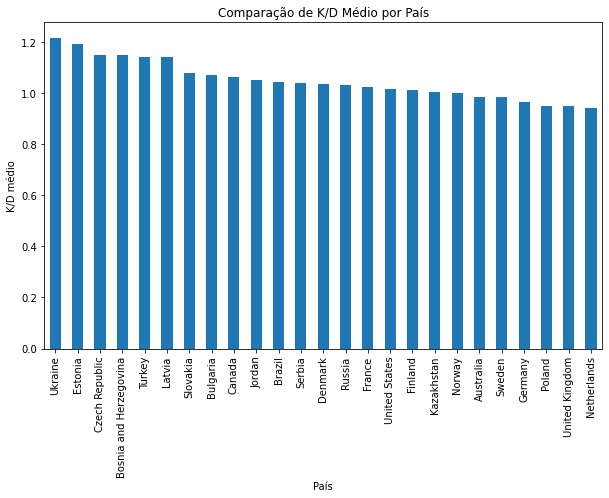

País com o maior K/D médio: Ukraine


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('player_stats.xlsx')
# Agrupando jogadores por país e calculando a média de K/D para cada país
grouped_df = df.groupby('Country')['K/D'].mean()
country_with_highest_kd = grouped_df.idxmax()

grouped_df_sorted = grouped_df.sort_values(ascending=False)
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
grouped_df_sorted.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('K/D médio')
plt.title('Comparação de K/D Médio por País')

# Exibindo o gráfico
plt.show()

print("País com o maior K/D médio:", country_with_highest_kd)

In [2]:
import matplotlib.pyplot as plt

# Agrupando jogadores por país e calculando a média de K/D para cada país
players_count = df.groupby('Country').size()

# Filtrando países com mais de 5 jogadores
countries_5_more =  players_count[players_count >=5]

filtered_df = df[df['Country'].isin(countries_5_more.index)]

result_df = filtered_df.groupby('Country')['K/D'].mean().reset_index()

result_df.sort_values(by='K/D', ascending=False)


,Country,K/D
0,Brazil,1.043750
1,Denmark,1.034500
4,Russia,1.032222
2,France,1.024444
6,United States,1.013750
5,Sweden,0.983077
3,Germany,0.965000


In [3]:
import matplotlib.pyplot as plt

# Agrupando jogadores por país e calculando a média de K/D para cada país
players_count = df.groupby('Country').size()

# Filtrando países com mais de 5 jogadores
countries_5_more =  players_count[players_count >=5]

filtered_df = df[df['Country'].isin(countries_5_more.index)]

result_df = filtered_df.groupby('Country')['ADR'].mean().reset_index()

result_df.sort_values(by='ADR', ascending=False)

,Country,ADR
6,United States,75.912500
1,Denmark,74.700000
0,Brazil,74.512500
5,Sweden,74.446154
2,France,74.288889
4,Russia,74.166667
3,Germany,72.750000


In [6]:
df

,Name,Country,Maps Played,Rounds Played,K-D Diff,K/D,Headshot %,ADR,KPR,KAST,Rating 2.0
0,s1mple,Ukraine,1048,27905,6852,1.40,40.6%,85.7,0.85,74.5%,1.30
1,ZywOo,France,756,20164,4274,1.35,39.2%,84.5,0.81,75.0%,1.29
2,NiKo,Bosnia and Herzegovina,1133,30248,3725,1.19,50.2%,85.3,0.78,71.3%,1.20
3,device,Denmark,937,24730,3763,1.25,33.7%,79.8,0.77,71.2%,1.19
4,blameF,Denmark,620,16898,2066,1.20,40.0%,83.5,0.74,72.5%,1.18
...,...,...,...,...,...,...,...,...,...,...,...
102,denis,Germany,529,13991,-1388,0.86,44.3%,70.9,0.63,65.6%,0.95
103,TACO,Brazil,807,21226,-1688,0.88,50.4%,65.1,0.58,68.0%,0.93
104,friberg,Sweden,539,14272,-1545,0.85,46.3%,69.6,0.60,67.3%,0.93
105,karrigan,Denmark,1106,29408,-3234,0.84,46.7%,68.5,0.59,66.4%,0.93
